# 6.1 Data for Comparing Groups

In [1]:
load("./segdf-Rintro-Ch5.RData")
summary(seg.df)

      age           gender        income            kids        ownHome   
 Min.   :19.26   Female:157   Min.   : -5183   Min.   :0.00   ownNo :159  
 1st Qu.:33.01   Male  :143   1st Qu.: 39656   1st Qu.:0.00   ownYes:141  
 Median :39.49                Median : 52014   Median :1.00               
 Mean   :41.20                Mean   : 50937   Mean   :1.27               
 3rd Qu.:47.90                3rd Qu.: 61403   3rd Qu.:2.00               
 Max.   :80.49                Max.   :114278   Max.   :7.00               
  subscribe         Segment   
 subNo :260   Moving Up : 70  
 subYes: 40   Suburb mix:100  
              Travelers : 80  
              Urban hip : 50  
                              
                              

# 6.2 Testing Group Frequencies: chisq.test()

In [2]:
tmp.tab <- table(rep(c(1:4), times=c(25,25,25,20)))
tmp.tab
chisq.test(tmp.tab)


 1  2  3  4 
25 25 25 20 


	Chi-squared test for given probabilities

data:  tmp.tab
X-squared = 0.78947, df = 3, p-value = 0.852


In [3]:
tmp.tab <- table(rep(c(1:4), times=c(25,25,25,10)))
chisq.test(tmp.tab)


	Chi-squared test for given probabilities

data:  tmp.tab
X-squared = 7.9412, df = 3, p-value = 0.04724


In [4]:
tmp.tab <- tmp.tab / 5
chisq.test(tmp.tab)

Warning message in chisq.test(tmp.tab):
“Chi-squared approximation may be incorrect”


	Chi-squared test for given probabilities

data:  tmp.tab
X-squared = 1.5882, df = 3, p-value = 0.6621


In [5]:
chisq.test(table(seg.df$Segment))


	Chi-squared test for given probabilities

data:  table(seg.df$Segment)
X-squared = 17.333, df = 3, p-value = 0.0006035


In [6]:
table(seg.df$subscribe, seg.df$ownHome)
chisq.test(table(seg.df$subscribe, seg.df$ownHome))

        
         ownNo ownYes
  subNo    137    123
  subYes    22     18


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(seg.df$subscribe, seg.df$ownHome)
X-squared = 0.010422, df = 1, p-value = 0.9187


In [7]:
chisq.test(table(seg.df$subscribe, seg.df$ownHome), correct=FALSE)


	Pearson's Chi-squared test

data:  table(seg.df$subscribe, seg.df$ownHome)
X-squared = 0.074113, df = 1, p-value = 0.7854


In [8]:
chisq.test(table(seg.df$subscribe, seg.df$ownHome), sim=TRUE, B=10000)


	Pearson's Chi-squared test with simulated p-value (based on 10000
	replicates)

data:  table(seg.df$subscribe, seg.df$ownHome)
X-squared = 0.074113, df = NA, p-value = 0.8686


# 6.3 Testing Observed Proportions: binom.test()

In [9]:
binom.test(12,20,p=0.5)


	Exact binomial test

data:  12 and 20
number of successes = 12, number of trials = 20, p-value = 0.5034
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.3605426 0.8088099
sample estimates:
probability of success 
                   0.6 


## 6.3.2 More About binom.test() and Binomial Distribution

In [10]:
binom.test(120,200,p=0.5)


	Exact binomial test

data:  120 and 200
number of successes = 120, number of trials = 200, p-value = 0.005685
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.5285357 0.6684537
sample estimates:
probability of success 
                   0.6 


In [11]:
sum(dbinom(8:12,20,0.5))

[1] 0.736824

In [12]:
library(binom)
binom.confint(12,20,method="ac") # method = agresti-coull

method,x,n,mean,lower,upper
agresti-coull,12,20,0.6,0.3860304,0.7817446


In [13]:
binom.confint(0,20,method="ac")

method,x,n,mean,lower,upper
agresti-coull,0,20,0,-0.0286844,0.1898096


# 6.4 Testing Group Means: t.test()

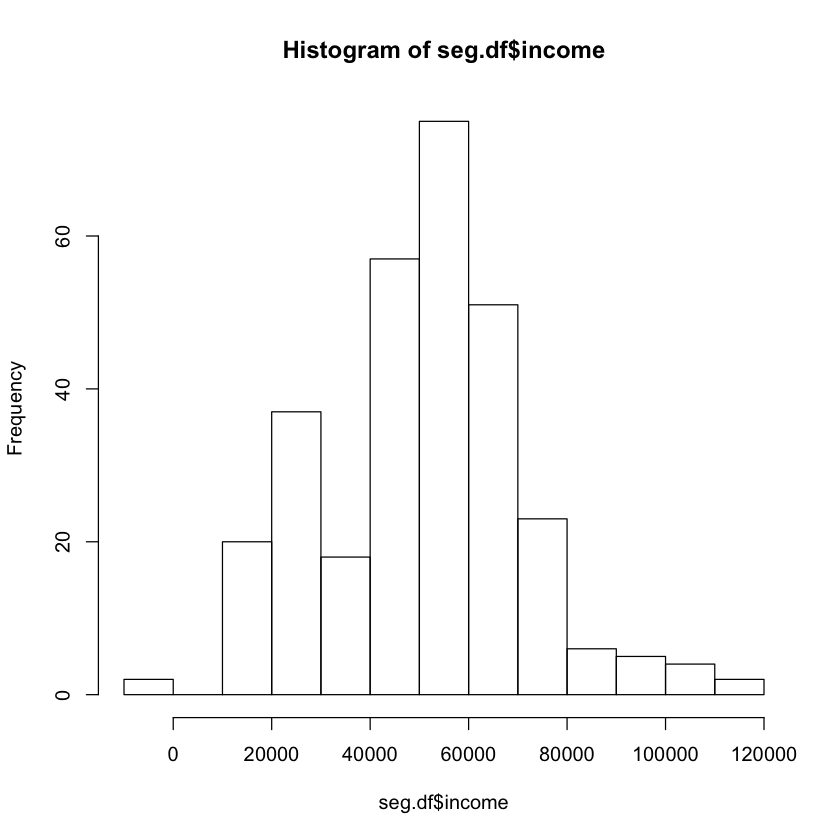

In [14]:
hist(seg.df$income)

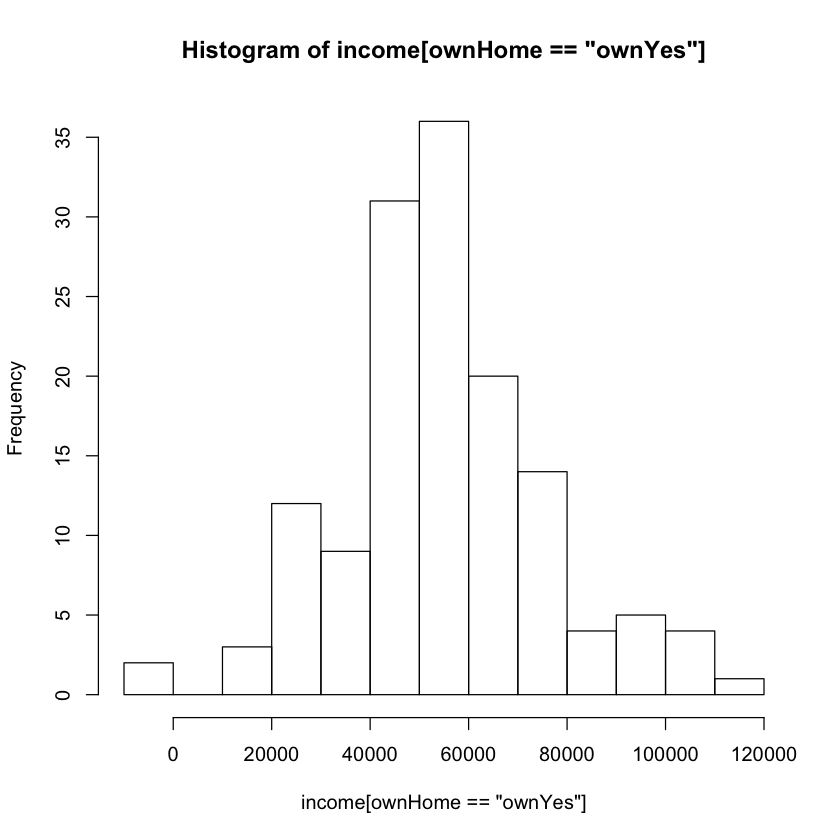

In [15]:
with(seg.df, hist(income[ownHome=="ownYes"]))

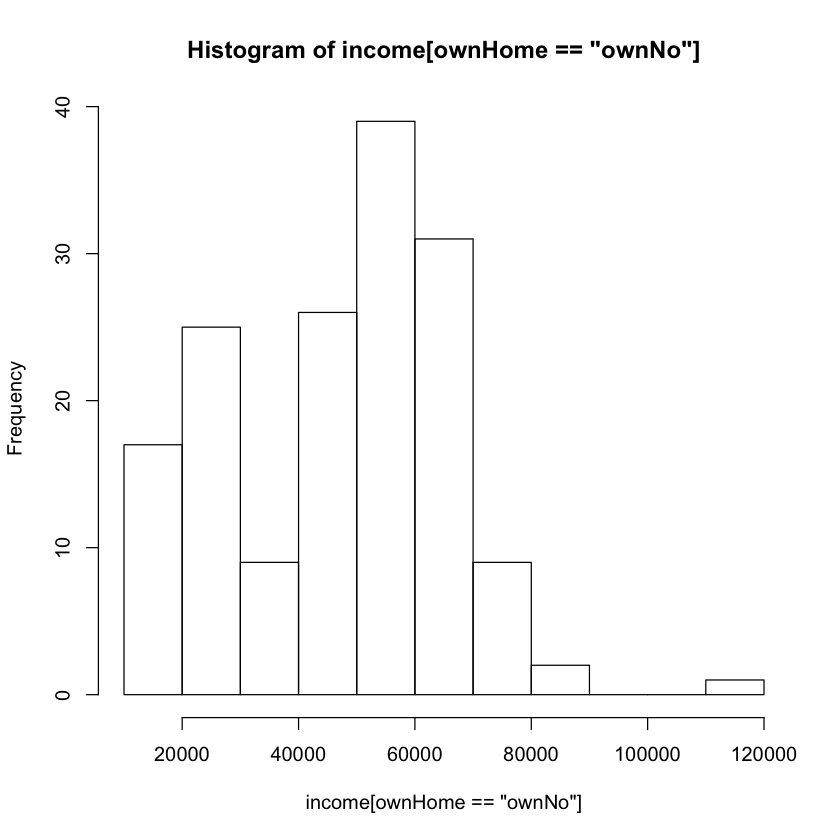

In [16]:
with(seg.df, hist(income[ownHome=="ownNo"]))

In [17]:
t.test(income ~ ownHome, data=seg.df)


	Welch Two Sample t-test

data:  income by ownHome
t = -3.2731, df = 285.25, p-value = 0.001195
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -12080.155  -3007.193
sample estimates:
 mean in group ownNo mean in group ownYes 
            47391.01             54934.68 


In [18]:
t.test(income ~ ownHome, data=subset(seg.df, Segment=="Travelers"))


	Welch Two Sample t-test

data:  income by ownHome
t = 0.26561, df = 53.833, p-value = 0.7916
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -8508.993 11107.604
sample estimates:
 mean in group ownNo mean in group ownYes 
            63188.42             61889.12 


# 6.5 Testing Multiple Group Means: ANOVA

In [19]:
seg.aov.own <- aov(income ~ ownHome, data=seg.df)
anova(seg.aov.own)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
ownHome,1,4252661211,4252661211,10.83174,0.001117655
Residuals,298,116998087011,392611030,NA,NA


In [20]:
seg.aov.own <- aov(income ~ Segment, data=seg.df)
anova(seg.aov.own)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Segment,3,54969675428,18323225143,81.82841,1.409305e-38
Residuals,296,66281072794,223922543,NA,NA


In [21]:
anova(aov(income ~ Segment + ownHome, data=seg.df))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Segment,3,54969675428,18323225143,81.6380780,1.773744e-38
ownHome,1,69918004,69918004,0.3115157,5.771749e-01
Residuals,295,66211154791,224444593,NA,NA


In [22]:
anova(aov(income ~ Segment * ownHome, data=seg.df))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Segment,3,54969675428,18323225143,81.1304712,3.358880e-38
ownHome,1,69918004,69918004,0.3095787,5.783649e-01
Segment:ownHome,3,263285130,87761710,0.3885860,7.613080e-01
Residuals,292,65947869661,225848869,NA,NA


## 6.5.1 Model Comparison in ANOVA

In [23]:
anova(aov(income ~ Segment, data=seg.df),
     aov(income ~ Segment + ownHome, data=seg.df))

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
296,66281072794,NA,NA,NA,NA
295,66211154791,1,69918004,0.3115157,0.5771749


## 6.5.2 Visualizing Group Confidence Intervals

In [24]:
library(multcomp)
seg.aov <- aov(income ~ Segment, data=seg.df)
glht(seg.aov)

Loading required package: mvtnorm
Loading required package: survival
Loading required package: TH.data
Loading required package: MASS

Attaching package: ‘TH.data’

The following object is masked from ‘package:MASS’:

    geyser




	 General Linear Hypotheses

Linear Hypotheses:
                       Estimate
(Intercept) == 0          53091
SegmentSuburb mix == 0     1943
SegmentTravelers == 0      9123
SegmentUrban hip == 0    -31409


In [25]:
seg.aov <- aov(income ~-1 + Segment, data=seg.df)
glht(seg.aov)


	 General Linear Hypotheses

Linear Hypotheses:
                       Estimate
SegmentMoving Up == 0     53091
SegmentSuburb mix == 0    55034
SegmentTravelers == 0     62214
SegmentUrban hip == 0     21682


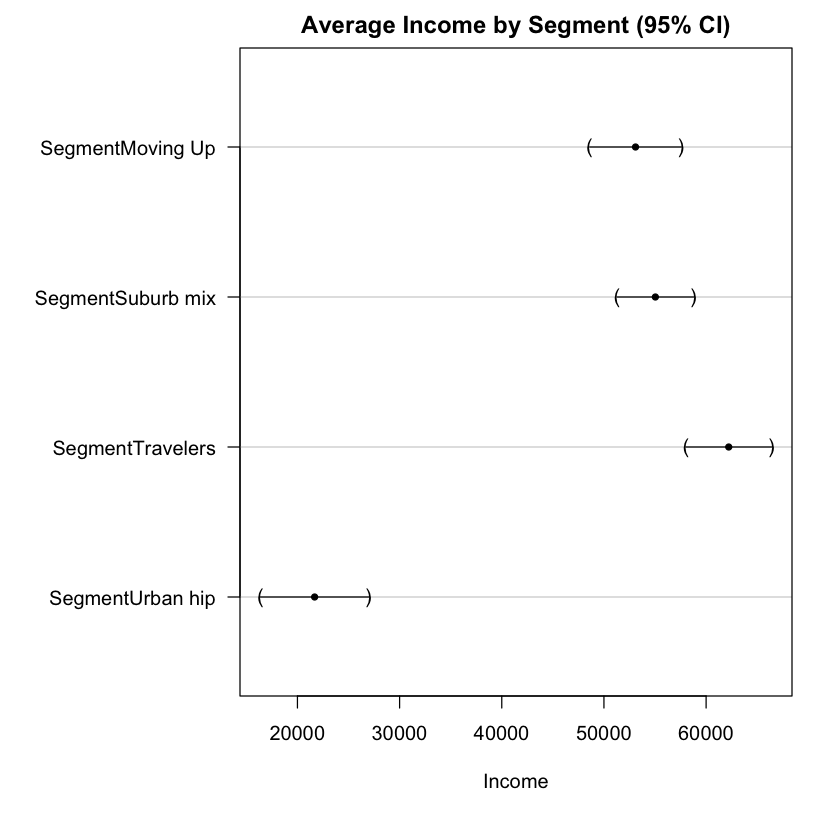

In [26]:
par(mar=c(6,10,2,2))
plot(glht(seg.aov),
    xlab="Income", main="Average Income by Segment (95% CI)")

## 6.5.3 Variable Selection in ANOVA: Stepwise Modeling

In [27]:
seg.aov.step <- step(aov(income ~ .,data=seg.df))

Start:  AIC=5779.17
income ~ age + gender + kids + ownHome + subscribe + Segment

            Df  Sum of Sq        RSS    AIC
- age        1 4.7669e+06 6.5661e+10 5777.2
- ownHome    1 1.0337e+08 6.5759e+10 5777.6
- kids       1 1.3408e+08 6.5790e+10 5777.8
- subscribe  1 1.5970e+08 6.5816e+10 5777.9
- gender     1 2.6894e+08 6.5925e+10 5778.4
<none>                    6.5656e+10 5779.2
- Segment    3 1.9303e+10 8.4959e+10 5850.5

Step:  AIC=5777.19
income ~ gender + kids + ownHome + subscribe + Segment

            Df  Sum of Sq        RSS    AIC
- ownHome    1 1.0159e+08 6.5762e+10 5775.7
- kids       1 1.3205e+08 6.5793e+10 5775.8
- subscribe  1 1.5794e+08 6.5819e+10 5775.9
- gender     1 2.7009e+08 6.5931e+10 5776.4
<none>                    6.5661e+10 5777.2
- Segment    3 4.9044e+10 1.1470e+11 5938.6

Step:  AIC=5775.66
income ~ gender + kids + subscribe + Segment

            Df  Sum of Sq        RSS    AIC
- kids       1 1.0707e+08 6.5869e+10 5774.1
- subscribe  1 1.6370e+08 6.

In [28]:
anova(seg.aov.step)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Segment,3,54969675428,18323225143,81.82841,1.409305e-38
Residuals,296,66281072794,223922543,NA,NA


# 6.6 Bayesian ANOVA: Getting Started
## 6.6.2 Basics of Bayesian ANOVA

In [30]:
set.seed(96761)
library(BayesFactor)
seg.bf1 <- lmBF(income ~ Segment, data=seg.df)
seg.bf2 <- lmBF(income ~ Segment + ownHome, data=seg.df)
seg.bf1 / seg.bf2

Bayes factor analysis
--------------
[1] Segment : 6.579729 ±1.62%

Against denominator:
  income ~ Segment + ownHome 
---
Bayes factor type: BFlinearModel, JZS


In [31]:
seg.bf.chain <- posterior(seg.bf1, 1, iterations = 10000)

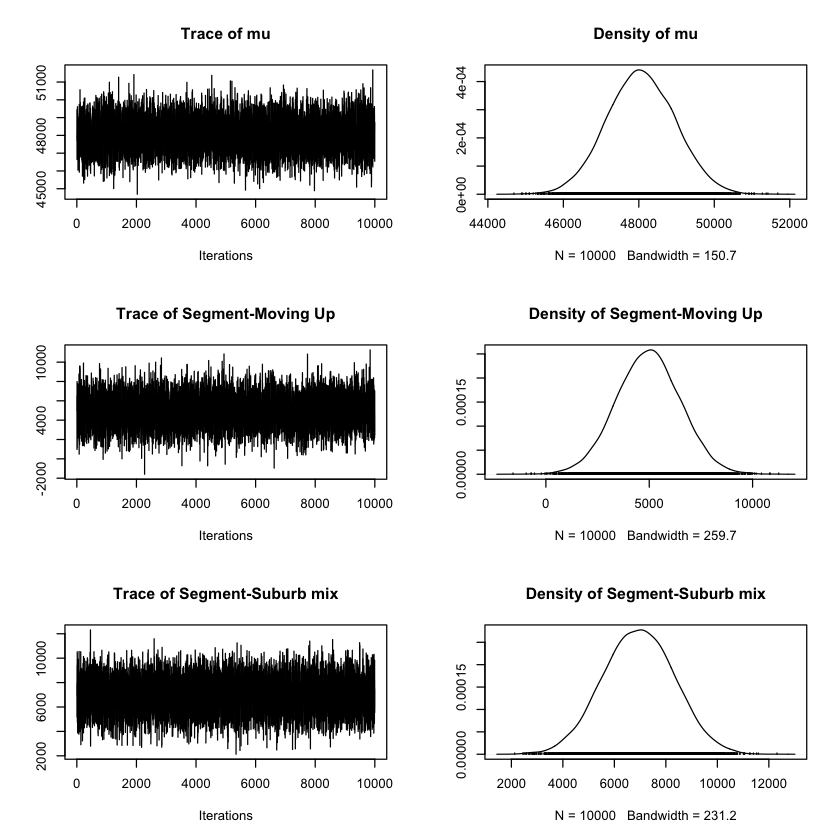

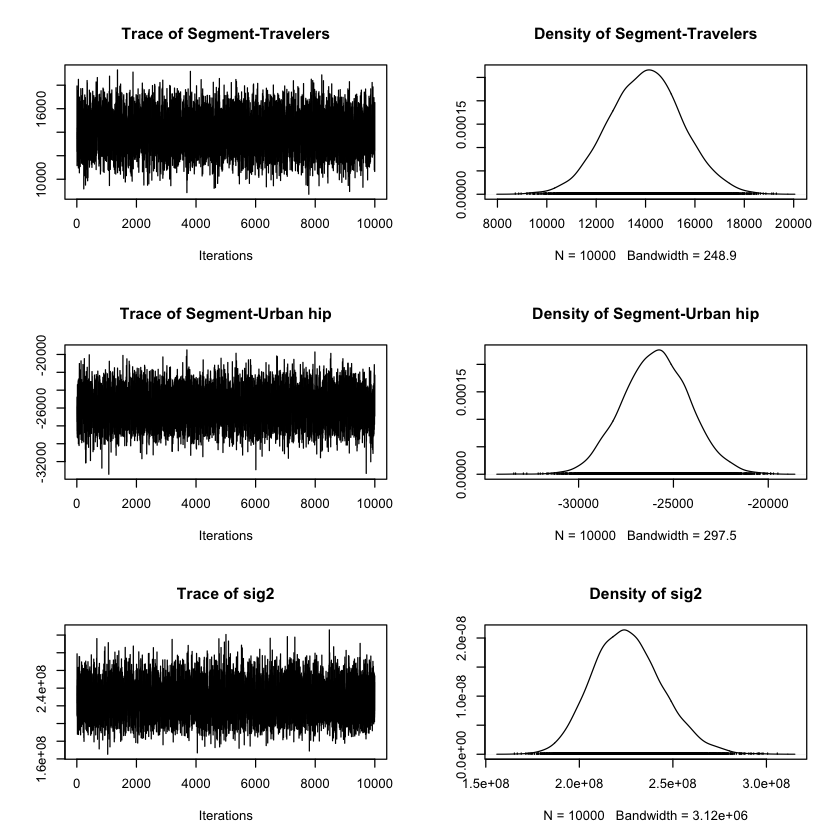

In [32]:
plot(seg.bf.chain[,1:6])

## 6.6.3 Inspecting the Posterior Draws

In [33]:
summary(seg.bf.chain)


Iterations = 1:10000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                         Mean        SD  Naive SE Time-series SE
mu                  4.806e+04 8.969e+02 8.969e+00      8.805e+00
Segment-Moving Up   4.958e+03 1.546e+03 1.546e+01      1.546e+01
Segment-Suburb mix  6.943e+03 1.376e+03 1.376e+01      1.376e+01
Segment-Travelers   1.401e+04 1.490e+03 1.490e+01      1.516e+01
Segment-Urban hip  -2.591e+04 1.771e+03 1.771e+01      1.874e+01
sig2                2.259e+08 1.857e+07 1.857e+05      1.857e+05
g_Segment           2.159e+00 3.509e+00 3.509e-02      4.141e-02

2. Quantiles for each variable:

                         2.5%        25%        50%        75%      97.5%
mu                  4.631e+04  4.745e+04  4.805e+04  4.867e+04  4.982e+04
Segment-Moving Up   1.938e+03  3.910e+03  4.963e+03  5.983e+03  7.970e+03
Segment-Suburb mix  4.227e+0

In [34]:
head(seg.bf.chain)

Markov Chain Monte Carlo (MCMC) output:
Start = 1 
End = 7 
Thinning interval = 1 
           mu Segment-Moving Up Segment-Suburb mix Segment-Travelers
[1,] 48055.75         4964.3516           6909.129          13983.40
[2,] 47706.52         6524.7816           7909.242          12359.19
[3,] 48361.79         5608.6227           7553.687          14379.18
[4,] 49396.99         5468.3964           7568.978          12856.49
[5,] 48176.00         5779.9796           5168.127          13859.16
[6,] 49446.75          967.5255           8146.482          17934.65
[7,] 46642.84         3881.8313           7745.062          15994.53
     Segment-Urban hip      sig2 g_Segment
[1,]         -25856.88 223195155 0.7316603
[2,]         -26793.21 242898612 1.1039380
[3,]         -27541.49 212341099 0.6072468
[4,]         -25893.87 209311778 6.4883641
[5,]         -24807.27 249067333 1.4835350
[6,]         -27048.66 249931184 4.6603455
[7,]         -27621.42 220032043 3.1488707

In [36]:
# seg.bf.chain は平均と平均からの差が入ってる
seg.bf.chain[1:4, 1:5] 

mu,Segment-Moving Up,Segment-Suburb mix,Segment-Travelers,Segment-Urban hip
48055.75,4964.352,6909.129,13983.40,-25856.88
47706.52,6524.782,7909.242,12359.19,-26793.21
48361.79,5608.623,7553.687,14379.18,-27541.49
49396.99,5468.396,7568.978,12856.49,-25893.87


In [38]:
# 全てのSegment で平均に足し込めば，各Segment の水準がわかる
seg.bf.chain[1:4, 2:5] + seg.bf.chain[1:4, 1]

Segment-Moving Up,Segment-Suburb mix,Segment-Travelers,Segment-Urban hip
53020.10,54964.87,62039.15,22198.86
54231.30,55615.76,60065.71,20913.31
53970.41,55915.48,62740.98,20820.30
54865.39,56965.97,62253.49,23503.12


In [40]:
# 絶対水準のmatrixを作る
seg.bf.chain.total <- seg.bf.chain[, 2:5] + seg.bf.chain[, 1]
seg.bf.ci <- t(apply(seg.bf.chain.total, 2, quantile, pr=c(0.025, 0.5, 0.975)))
seg.bf.ci

,2.5%,50%,97.5%
Segment-Moving Up,49558.48,53017.70,56472.80
Segment-Suburb mix,52077.24,55001.33,57911.31
Segment-Travelers,58798.46,62101.16,65345.16
Segment-Urban hip,17868.25,22161.13,26370.48


## 6.6.4 Plotting the Bayesian Credible Intervals

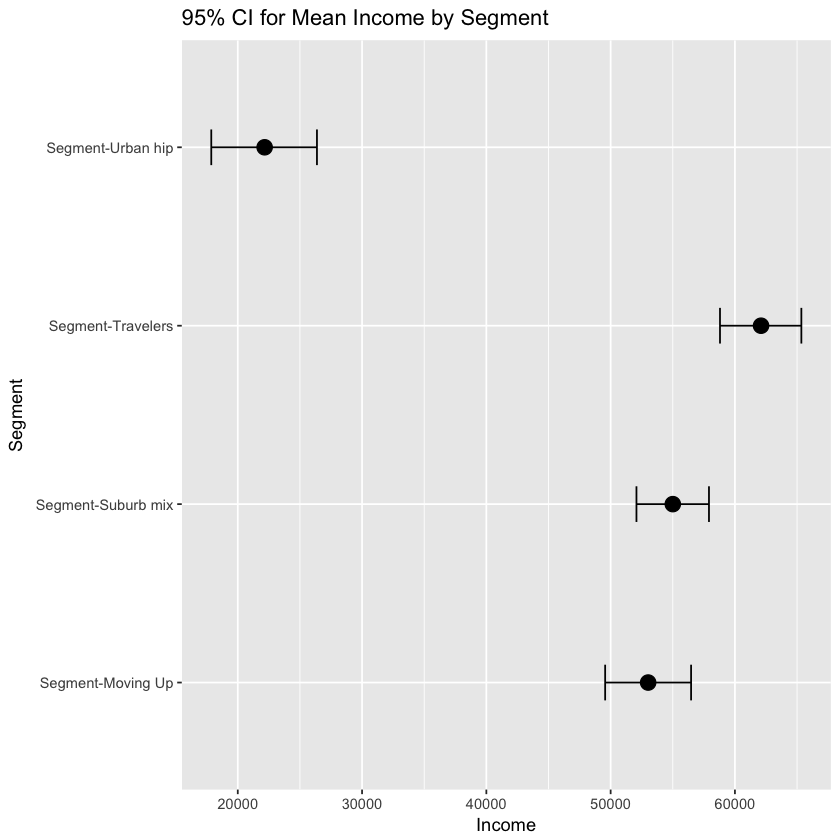

In [45]:
seg.bf.df <- data.frame(seg.bf.ci)
seg.bf.df$Segment <- rownames(seg.bf.df)

# グラフ書く
library(ggplot2)
p <- ggplot(seg.bf.df, aes(x=Segment, y=X50., ymax=X97.5., ymin=X2.5.))
p <-p + geom_point(size=4) + geom_errorbar(width=0.2) + ylab("Income")
p + ggtitle("95% CI for Mean Income by Segment")  + coord_flip()